In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_json('/content/gdrive/MyDrive/mini_sparkify_event_data.json', lines = True)

In [ ]:
df.head()

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,lastName,firstName,registration,gender,artist,song,length
0,1538352117000,30,29,NextSong,Logged In,PUT,200,paid,50,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Martha Tilston,Rockpools,277.89016
1,1538352180000,9,8,NextSong,Logged In,PUT,200,free,79,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Five Iron Frenzy,Canada,236.09424
2,1538352394000,30,29,NextSong,Logged In,PUT,200,paid,51,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Adam Lambert,Time For Miracles,282.82730
3,1538352416000,9,8,NextSong,Logged In,PUT,200,free,80,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Enigma,Knocking On Forbidden Doors,262.71302
4,1538352676000,30,29,NextSong,Logged In,PUT,200,paid,52,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Daft Punk,Harder Better Faster Stronger,223.60771


In [ ]:
df['ts'] = pd.to_datetime(df['ts'], unit='ms')

In [ ]:
df

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,lastName,firstName,registration,gender,artist,song,length
0,2018-10-01 00:01:57,30,29,NextSong,Logged In,PUT,200,paid,50,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Martha Tilston,Rockpools,277.89016
1,2018-10-01 00:03:00,9,8,NextSong,Logged In,PUT,200,free,79,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Five Iron Frenzy,Canada,236.09424
2,2018-10-01 00:06:34,30,29,NextSong,Logged In,PUT,200,paid,51,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Adam Lambert,Time For Miracles,282.82730
3,2018-10-01 00:06:56,9,8,NextSong,Logged In,PUT,200,free,80,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Enigma,Knocking On Forbidden Doors,262.71302
4,2018-10-01 00:11:16,30,29,NextSong,Logged In,PUT,200,paid,52,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Daft Punk,Harder Better Faster Stronger,223.60771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286495,2018-11-30 23:57:20,,500,Home,Logged Out,GET,200,paid,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286496,2018-11-30 23:57:21,,500,Login,Logged Out,PUT,307,paid,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286497,2018-11-30 23:57:28,300011,500,Home,Logged In,GET,200,paid,43,"New York-Newark-Jersey City, NY-NJ-PA",Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,House,Emilia,1.538337e+12,F,NaN,NaN,NaN
286498,2018-11-30 23:59:58,300011,500,About,Logged In,GET,200,paid,44,"New York-Newark-Jersey City, NY-NJ-PA",Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,House,Emilia,1.538337e+12,F,NaN,NaN,NaN


In [ ]:
#Checking for percentage of nulls
df.isnull().sum()*100/len(df)

ts                0.000000
userId            0.000000
sessionId         0.000000
page              0.000000
auth              0.000000
method            0.000000
status            0.000000
level             0.000000
itemInSession     0.000000
location          2.913089
userAgent         2.913089
lastName          2.913089
firstName         2.913089
registration      2.913089
gender            2.913089
artist           20.381152
song             20.381152
length           20.381152
dtype: float64

In [ ]:
df = df.drop(columns={'lastName', 'firstName', 'status','userAgent'})

In [ ]:
df[df['registration'].isnull()]

,ts,userId,sessionId,page,auth,method,level,itemInSession,location,registration,gender,artist,song,length
57,2018-10-01 01:02:25,,8,Home,Logged Out,GET,free,100,NaN,NaN,NaN,NaN,NaN,NaN
58,2018-10-01 01:03:27,,8,Help,Logged Out,GET,free,101,NaN,NaN,NaN,NaN,NaN,NaN
59,2018-10-01 01:04:01,,8,Home,Logged Out,GET,free,102,NaN,NaN,NaN,NaN,NaN,NaN
60,2018-10-01 01:04:02,,8,Login,Logged Out,PUT,free,103,NaN,NaN,NaN,NaN,NaN,NaN
76,2018-10-01 01:17:58,,240,Home,Logged Out,GET,free,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286423,2018-11-30 19:06:16,,498,Home,Logged Out,GET,paid,5,NaN,NaN,NaN,NaN,NaN,NaN
286424,2018-11-30 19:06:17,,498,Login,Logged Out,PUT,paid,6,NaN,NaN,NaN,NaN,NaN,NaN
286494,2018-11-30 23:55:35,,500,Home,Logged Out,GET,paid,40,NaN,NaN,NaN,NaN,NaN,NaN
286495,2018-11-30 23:57:20,,500,Home,Logged Out,GET,paid,41,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_updated = df.dropna(subset = ['registration'])

In [ ]:
df_updated.isnull().sum()*100/len(df_updated)

ts                0.000000
userId            0.000000
sessionId         0.000000
page              0.000000
auth              0.000000
method            0.000000
level             0.000000
itemInSession     0.000000
location          0.000000
registration      0.000000
gender            0.000000
artist           17.992191
song             17.992191
length           17.992191
dtype: float64

In [ ]:
mask = df_updated['artist'].isnull()
df_updated[mask]['page'].value_counts()

Thumbs Up                    12551
Home                         10082
Add to Playlist               6526
Add Friend                    4277
Roll Advert                   3933
Logout                        3226
Thumbs Down                   2546
Downgrade                     2055
Settings                      1514
Help                          1454
Upgrade                        499
About                          495
Save Settings                  310
Error                          252
Submit Upgrade                 159
Submit Downgrade                63
Cancel                          52
Cancellation Confirmation       52
Name: page, dtype: int64

In [ ]:
len(df_updated['userId'].unique()) #Total number of unique users

225

In [ ]:
#Displaying all unique pages
for i in df_updated.page.unique():
  print(i)

NextSong
Add to Playlist
Roll Advert
Thumbs Up
Downgrade
Thumbs Down
Home
Logout
Help
Upgrade
Add Friend
Settings
Submit Upgrade
About
Submit Downgrade
Error
Save Settings
Cancel
Cancellation Confirmation


##### Defining Target Variables for Churn

In [ ]:
#Considering churned users are the users who have cancelled(i.e page Cancellation Confirmation)

num_churned_users = len(df_updated[df_updated['page'] =='Cancellation Confirmation']['userId'].unique())
print ("Percentage of churned users: ", num_churned_users/len(df_updated.userId.unique())*100)

Percentage of churned users:  23.11111111111111


In [ ]:
len(df_updated.userId.unique())

225

In [ ]:
#Adding the churned label to the main dataset

def label_churned (row):
  if row['page'] == 'Cancellation Confirmation' :
    return 1
  else:
    return 0

def label_downgraded (row):
  if row['page'] == 'Submit Downgrade' :
    return 1
  else:
    return 0

df_with_churn_label = df_updated.copy()
df_with_churn_label['churn_label'] = df_updated.apply (lambda row: label_churned(row), axis=1)
df_with_churn_label['churn_label'] = df_updated.apply (lambda row: label_churned(row), axis=1)

In [ ]:
df2 = df_with_churn_label.groupby("userId")[["churn_label"]].max().reset_index().rename(columns={"churn_label":"churn"})
df_final = df_with_churn_label.merge(df2, how='left', on='userId')

In [ ]:
df_final = df_final.drop(columns = 'churn_label')
df_final

,ts,userId,sessionId,page,auth,method,level,itemInSession,location,registration,gender,artist,song,length,churn
0,2018-10-01 00:01:57,30,29,NextSong,Logged In,PUT,paid,50,"Bakersfield, CA",1.538173e+12,M,Martha Tilston,Rockpools,277.89016,0
1,2018-10-01 00:03:00,9,8,NextSong,Logged In,PUT,free,79,"Boston-Cambridge-Newton, MA-NH",1.538332e+12,M,Five Iron Frenzy,Canada,236.09424,0
2,2018-10-01 00:06:34,30,29,NextSong,Logged In,PUT,paid,51,"Bakersfield, CA",1.538173e+12,M,Adam Lambert,Time For Miracles,282.82730,0
3,2018-10-01 00:06:56,9,8,NextSong,Logged In,PUT,free,80,"Boston-Cambridge-Newton, MA-NH",1.538332e+12,M,Enigma,Knocking On Forbidden Doors,262.71302,0
4,2018-10-01 00:11:16,30,29,NextSong,Logged In,PUT,paid,52,"Bakersfield, CA",1.538173e+12,M,Daft Punk,Harder Better Faster Stronger,223.60771,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278149,2018-11-30 23:55:21,300011,500,NextSong,Logged In,PUT,paid,38,"New York-Newark-Jersey City, NY-NJ-PA",1.538337e+12,F,Iron Maiden,Murders In The Rue Morgue (1998 Digital Remaster),258.66404,0
278150,2018-11-30 23:55:22,300011,500,Logout,Logged In,PUT,paid,39,"New York-Newark-Jersey City, NY-NJ-PA",1.538337e+12,F,NaN,NaN,NaN,0
278151,2018-11-30 23:57:28,300011,500,Home,Logged In,GET,paid,43,"New York-Newark-Jersey City, NY-NJ-PA",1.538337e+12,F,NaN,NaN,NaN,0
278152,2018-11-30 23:59:58,300011,500,About,Logged In,GET,paid,44,"New York-Newark-Jersey City, NY-NJ-PA",1.538337e+12,F,NaN,NaN,NaN,0


This means that 23% users have churned. This is a very high percentage.

In [ ]:
unique_users = list(df_with_churn_label['userId'].unique())
len(unique_users)

225

In [ ]:
print(df_final.groupby('churn')['userId'].nunique())

churn
0    173
1     52
Name: userId, dtype: int64


In [ ]:
# df_level_churned[df_level_churned['level'] == 'free']['userId'].unique()
# df_with_churn_label[df_with_churn_label['userId'].isin(unique_users)]

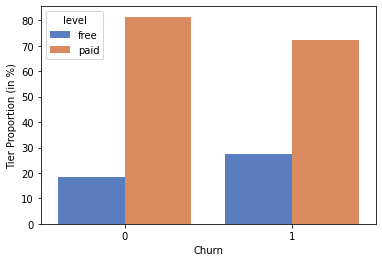

In [ ]:
import seaborn as sns

#free v/s paid users
level_df = df_final.groupby(['churn', 'level']).count()
churn_sum = level_df.groupby('churn', as_index=False).sum()
level_df['proportion'] = (level_df.join(churn_sum, on = 'churn', lsuffix='_1')['userId_1']/level_df.join(churn_sum, on = 'churn', lsuffix='_1')['userId'])*100
level_df = level_df.reset_index()
g = sns.barplot(x='churn', y="proportion", hue="level", data=level_df, palette="muted")
g.set(xlabel='Churn', ylabel="Tier Proportion (in %)")
plt.show();

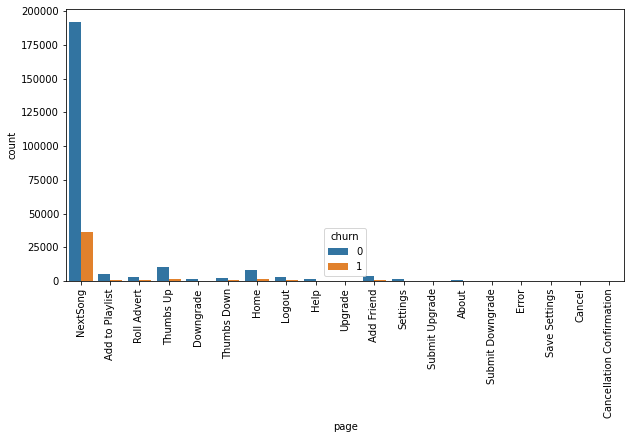

In [ ]:
#pages visited by churned/non-churned users
plt.figure(figsize=[10,5])
sns.countplot(x='page',data=df_final,hue='churn')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("Paid users: ",len(df_updated[df_updated['level'] == 'paid']['userId'].unique())) #paid users
print("Free users: ",len(df_updated[df_updated['level'] == 'free']['userId'].unique())) #free users
# df_updated[mask]['userId'].value_counts()

Paid users:  165
Free users:  195


The number of free + paid does not match with the total no. of unique users. This means that there may be a few users who moved from paid to free.

In [ ]:
#Now we will see the downgraded users

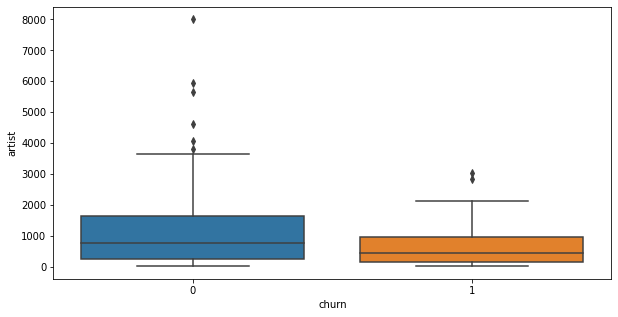

In [ ]:
#Comparing number of artists churned vd not churned
artist_df = df_final.groupby(['userId','churn'])['artist'].count().to_frame().reset_index()
plt.figure(figsize=[10,5])
# sns.countplot(x='userId',data=df_final.groupby(['userId','churn'])['artist'].count().to_frame().reset_index(),hue='churn')
# plt.xticks(rotation=90)
sns.boxplot(x="churn", y="artist", data=artist_df);
plt.show()




From the box plot above, you can see that churned users listen to less artists as compared to not churned users.

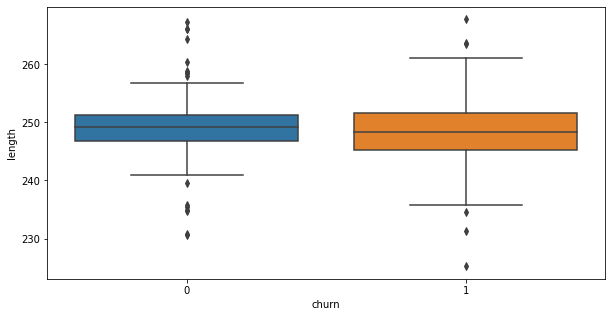

In [ ]:
#Comparing average duration of songs churned v/s non-churned
song_length_df = df_final.groupby(['userId','churn'])['length'].mean().to_frame().reset_index()
plt.figure(figsize=[10,5])
# sns.countplot(x='userId',data=df_final.groupby(['userId','churn'])['artist'].count().to_frame().reset_index(),hue='churn')
# plt.xticks(rotation=90)
sns.boxplot(x="churn", y="length", data=song_length_df);
plt.show()

From the above box plot you can compare the average duration of songs heard by each user (churned v/s not churned).
We can see that there is no significant difference in the average song length for churned and not churned users.

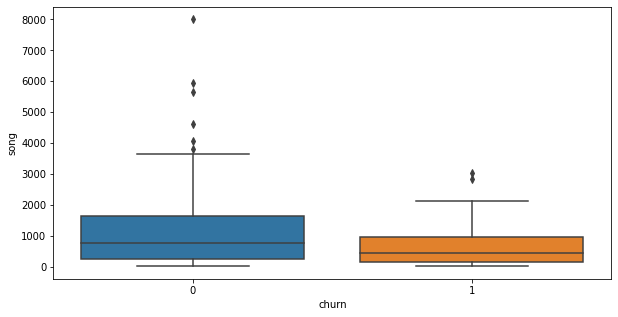

In [ ]:
song_df = df_final.groupby(['userId','churn'])['song'].count().to_frame().reset_index()
plt.figure(figsize=[10,5])
# sns.countplot(x='userId',data=df_final.groupby(['userId','churn'])['artist'].count().to_frame().reset_index(),hue='churn')
# plt.xticks(rotation=90)
sns.boxplot(x="churn", y="song", data=song_df);
plt.show()

Churned users listen to less number of songs on an average as compared to non-churned users

In [ ]:
# #checking last 5 pages visited by churned users
# df_page_churned_last_5_sessions = (df_churned.set_index('page')
#    .groupby('userId')['ts']
#    .nlargest(5)
#    .index
#    .to_frame()
#    .reset_index(drop=True))

In [ ]:
# df_page_churned_last_5_sessions.page.value_counts()

We can see that the users who have churned have downgraded 22 times, also these people saw advertisements 16 times, they gave thumbs down to a song 5 times

In [ ]:
# #checking last level status of churned users
# df_level_churned = (df_churned.set_index('level')
#    .groupby('userId')['ts']
#    .nlargest(5)
#    .index
#    .to_frame()
#    .reset_index(drop=True))

# churned_level = [len(df_level_churned[df_level_churned['level'] == 'free']['userId'].unique()), len(df_level_churned[df_level_churned['level'] == 'paid']['userId'].unique())]

In [ ]:
#Avg session duration for users
df_session = df_final[['userId', 'sessionId', 'ts','churn']]
session = (df_session.groupby(['userId', 'sessionId','churn']).max()['ts'] - df_session.groupby(['userId', 'sessionId', 'churn']).min()['ts']).to_frame().groupby(['userId','churn']).mean()['ts'].to_frame().reset_index()

session['session_duration_hours'] = list(np.zeros(len(session)))
for index, row in session.iterrows():
    session.loc[index,['session_duration_hours']] = pd.Timedelta(row['ts']).seconds / 3600.0
    row['session_duration_hours'] =  pd.Timedelta(row['ts']).seconds / 3600.0

session = session.drop(columns= 'ts')



In [ ]:
session_count = (df_session.groupby(['userId', 'churn']).count()['sessionId']).to_frame().reset_index()

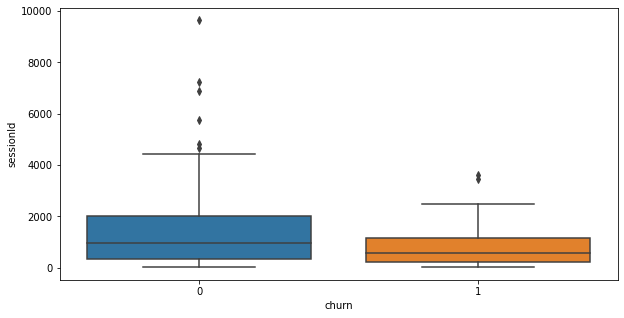

In [ ]:
#Comparing session counts for churned v/s not churned users
plt.figure(figsize=[10,5])
# sns.countplot(x='userId',data=df_final.groupby(['userId','churn'])['artist'].count().to_frame().reset_index(),hue='churn')
# plt.xticks(rotation=90)
sns.boxplot(x="churn", y="sessionId", data=session_count);
plt.show()

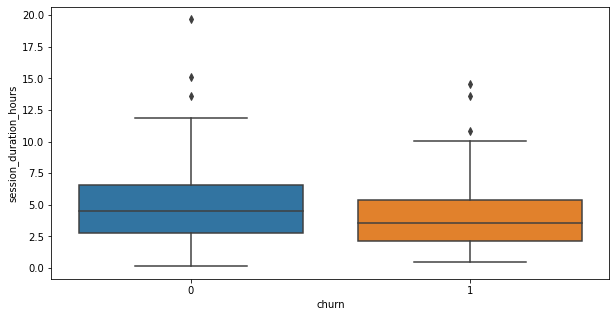

In [ ]:
#Comparing session duration for churned v/s not churned users
# song_df = df_final.groupby(['userId','churn'])['song'].count().to_frame().reset_index()
plt.figure(figsize=[10,5])
# sns.countplot(x='userId',data=df_final.groupby(['userId','churn'])['artist'].count().to_frame().reset_index(),hue='churn')
# plt.xticks(rotation=90)
sns.boxplot(x="churn", y="session_duration_hours", data=session);
plt.show()

Average session duration of churned users is less than that of not churned users.

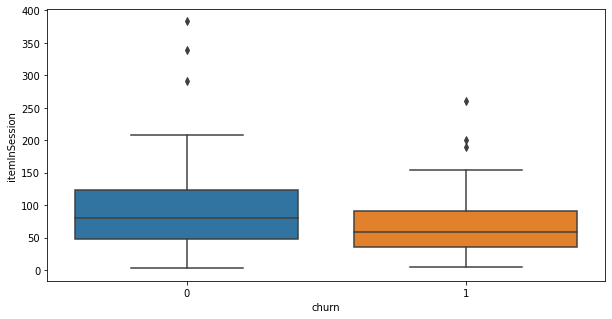

In [ ]:
#Items in session

df_item_in_session = df_final[['userId', 'sessionId','itemInSession', 'churn']]
df_avg_item_in_session = df_item_in_session.groupby(['userId', 'churn'])['itemInSession'].mean().to_frame().reset_index()
plt.figure(figsize=[10,5])
# sns.countplot(x='userId',data=df_final.groupby(['userId','churn'])['artist'].count().to_frame().reset_index(),hue='churn')
# plt.xticks(rotation=90)
sns.boxplot(x="churn", y="itemInSession", data=df_avg_item_in_session);
plt.show()


In [ ]:
df_location = df_final[['userId', 'location','churn']]
df_location = df_location.drop_duplicates()


In [ ]:
#Top locations for churned v/s not churned users
df_location.groupby('churn')['location'].apply(lambda x: x.value_counts().head(5))

churn                                             
0      Los Angeles-Long Beach-Anaheim, CA             13
       New York-Newark-Jersey City, NY-NJ-PA          10
       Dallas-Fort Worth-Arlington, TX                 6
       Charlotte-Concord-Gastonia, NC-SC               6
       St. Louis, MO-IL                                5
1      New York-Newark-Jersey City, NY-NJ-PA           5
       Los Angeles-Long Beach-Anaheim, CA              3
       Spokane-Spokane Valley, WA                      2
       Phoenix-Mesa-Scottsdale, AZ                     2
       Philadelphia-Camden-Wilmington, PA-NJ-DE-MD     2
Name: location, dtype: int64

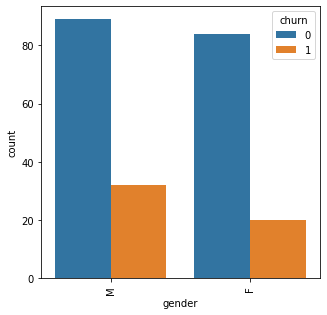

In [ ]:
#gender distribution among churned and not churned users

df_gender = df_final[['userId', 'gender','churn']]
df_gender = df_gender.drop_duplicates()

plt.figure(figsize=[5,5])
sns.countplot(x='gender',data=df_gender,hue='churn')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_level = df_final[['userId', 'level','churn']]
df_level = df_level.drop_duplicates()

In [ ]:
df_for_model = pd.merge(pd.merge(df_avg_item_in_session[['userId','itemInSession']], df_gender[['userId','gender']], on ='userId', how = 'inner'), df_location, on = 'userId', how = 'inner')
df_for_model = pd.merge(df_for_model, session[['userId', 'session_duration_hours']], on = 'userId')
df_for_model = pd.merge(df_for_model, session_count[['userId', 'sessionId']], on = 'userId')
df_for_model = pd.merge(df_for_model, song_df[['userId', 'song']], on = 'userId')
df_for_model = pd.merge(df_for_model, song_length_df[['userId', 'length']], on = 'userId')
df_for_model = pd.merge(df_for_model, artist_df[['userId', 'artist']], on = 'userId')
df_for_model

,userId,itemInSession,gender,location,churn,session_duration_hours,sessionId,song,length,artist
0,10,146.238994,M,"Laurel, MS",0,7.662222,795,673,247.944090,673
1,100,89.314872,M,"Dallas-Fort Worth-Arlington, TX",0,5.275278,3214,2682,250.886598,2682
2,100001,28.513369,F,"Miami-Fort Lauderdale-West Palm Beach, FL",1,2.469167,187,133,263.712347,133
3,100002,83.477064,F,"Santa Maria-Santa Barbara, CA",0,3.353056,218,195,254.153426,195
4,100003,40.653846,F,"Miami-Fort Lauderdale-West Palm Beach, FL",1,1.651944,78,51,241.302340,51
...,...,...,...,...,...,...,...,...,...,...
220,95,85.119082,F,"Phoenix-Mesa-Scottsdale, AZ",0,3.526667,2091,1694,252.146131,1694
221,96,185.794118,F,"Atlantic City-Hammonton, NJ",0,6.539444,2176,1802,251.105648,1802
222,97,124.046173,F,"Riverside-San Bernardino-Ontario, CA",0,4.471944,2404,1975,248.724808,1975
223,98,117.297129,M,"Houston-The Woodlands-Sugar Land, TX",0,6.175000,2891,2401,254.769670,2401


In [ ]:
user_artist = df_final.groupby("userId").agg({"artist": "count"})

**Beginning feature engineering and Modeling**

In [ ]:
#userid
#numsessions
#avgsessiondurations
#gender
#avg daily number of songs
#avg songs per session
#avg daily thumbs up
#avg daily thumbs down
#avg daily friends 
#average number of "add to playlist"
#active days   
#latest level of users before they churn


In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !add-apt-repository -y ppa:sergey-dryabzhinsky/packages
# !apt update
# !apt install sqlite3

In [ ]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
##feature engineering as user level

registered_days = """SELECT userid,gender,churn,round(julianday(max(ts)) - julianday(min(ts)),0) as active_days
       FROM df_final
       group by 1,2,1
       order by 1;
       """

registered_days_df = pysqldf(registered_days)

num_sessions = """SELECT userid,churn,count(distinct sessionid) as num_sessions
       FROM df_final
       group by 1,2
       order by 1; """
num_sessions_df = pysqldf(num_sessions)

avg_daily_features = """with a as (
       SELECT userid,churn,date(ts) as date,count(distinct song) as songs,count(case when page = 'Add Friend' then 1 end) as friends_added
       ,count(case when page = 'Thumbs Up' then 1 end) as thumbs_up,count(case when page = 'Thumbs Down' then 1 end) as thumbs_down
       ,count(case when page = 'Add to Playlist' then 1 end) as add_to_playlist,count(case when page = 'Roll Advert' then 1 end) as roll_advert
       FROM df_final
       group by 1,2,3
       order by 1,3
       )
       select userid,churn,avg(songs) as daily_avg_songs,avg(friends_added) as daily_avg_friends_added
       ,avg(thumbs_up) as daily_avg_thumbs_up,avg(thumbs_down) as daily_avg_thumbs_down
       ,avg(add_to_playlist) as daily_avg_add_to_playlist,avg(roll_advert) as daily_avg_roll_advert
       from a
       group by 1,2
       order by 1;
       """        
avg_daily_features_df = pysqldf(avg_daily_features)
 

avg_songs_per_session = """with a as (
       SELECT userid,churn,sessionid,count(case when page = 'NextSong' then 1 end) as songs_per_session
       FROM df_final
       group by 1,2,3
       order by 1,3
       )
       select userid,churn,avg(songs_per_session) as avg_songs_per_session
       from a
       group by 1,2
       order by 1
       """      
avg_songs_per_session_df = pysqldf(avg_songs_per_session)     

In [ ]:
last_level_before_churn = """with a as (
       SELECT userid,level,churn,date(ts) as date
       ,row_number () OVER (PARTITION BY userid ORDER BY ts desc) rnk
       FROM df_final
       )
       select *
       from a
       where rnk = 1
       """   
last_level_before_churn_df = pysqldf(last_level_before_churn) 
last_level_before_churn_df

,userid,level,churn,date,rnk
0,10,paid,0,2018-11-19,1
1,100,paid,0,2018-11-30,1
2,100001,free,1,2018-10-02,1
3,100002,paid,0,2018-12-03,1
4,100003,free,1,2018-10-11,1
...,...,...,...,...,...
220,95,free,0,2018-11-30,1
221,96,paid,0,2018-11-30,1
222,97,paid,0,2018-11-30,1
223,98,paid,0,2018-11-30,1


In [ ]:
##joining all features

model= """select userid,registered_days_df.gender,registered_days_df.churn,active_days,num_sessions,session_duration_hours
              ,daily_avg_songs,daily_avg_friends_added,daily_avg_thumbs_up,daily_avg_thumbs_down
              ,daily_avg_add_to_playlist,daily_avg_roll_advert,avg_songs_per_session,level
              from registered_days_df
              join num_sessions_df
              using(userid)
              join avg_daily_features_df
              using(userid)
              join avg_songs_per_session_df
              using(userid)
              join last_level_before_churn_df
              using(userid)
              join df_for_model
              using(userid)
"""
model_df = pysqldf(model) 
model_df

,userId,gender,churn,active_days,num_sessions,session_duration_hours,daily_avg_songs,daily_avg_friends_added,daily_avg_thumbs_up,daily_avg_thumbs_down,daily_avg_add_to_playlist,daily_avg_roll_advert,avg_songs_per_session,level
0,10,M,0,42.0,6,7.662222,83.250000,1.500000,4.625000,0.500000,1.125000,0.125000,112.166667,paid
1,100,M,0,59.0,35,5.275278,79.909091,1.484848,4.484848,0.818182,1.848485,0.757576,76.628571,paid
2,100001,F,1,1.0,4,2.469167,66.000000,1.000000,4.000000,1.000000,1.500000,7.000000,33.250000,free
3,100002,F,0,55.0,4,3.353056,39.000000,0.200000,1.000000,0.000000,1.000000,0.600000,48.750000,paid
4,100003,F,1,2.0,2,1.651944,25.500000,0.000000,1.500000,0.000000,1.000000,4.500000,25.500000,free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,95,F,0,60.0,33,3.526667,55.600000,1.066667,3.033333,0.833333,1.533333,1.666667,51.333333,free
221,96,F,0,58.0,19,6.539444,80.863636,1.818182,4.181818,1.090909,2.363636,0.772727,94.842105,paid
222,97,F,0,55.0,30,4.471944,72.074074,1.185185,4.000000,0.444444,2.259259,0.888889,65.833333,paid
223,98,M,0,59.0,28,6.175000,84.392857,1.607143,4.107143,0.785714,2.071429,1.071429,85.750000,paid


In [ ]:
model_df_copy = model_df.copy()
model_df_copy.drop(['userId'],inplace=True,axis=1)

In [ ]:
#encoding categorical variables

cat_columns = ['gender','level']
model_df_copy = pd.get_dummies(model_df_copy,columns=cat_columns,drop_first=True)
model_df_copy

,churn,active_days,num_sessions,session_duration_hours,daily_avg_songs,daily_avg_friends_added,daily_avg_thumbs_up,daily_avg_thumbs_down,daily_avg_add_to_playlist,daily_avg_roll_advert,avg_songs_per_session,gender_M,level_paid
0,0,42.0,6,7.662222,83.250000,1.500000,4.625000,0.500000,1.125000,0.125000,112.166667,1,1
1,0,59.0,35,5.275278,79.909091,1.484848,4.484848,0.818182,1.848485,0.757576,76.628571,1,1
2,1,1.0,4,2.469167,66.000000,1.000000,4.000000,1.000000,1.500000,7.000000,33.250000,0,0
3,0,55.0,4,3.353056,39.000000,0.200000,1.000000,0.000000,1.000000,0.600000,48.750000,0,1
4,1,2.0,2,1.651944,25.500000,0.000000,1.500000,0.000000,1.000000,4.500000,25.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0,60.0,33,3.526667,55.600000,1.066667,3.033333,0.833333,1.533333,1.666667,51.333333,0,0
221,0,58.0,19,6.539444,80.863636,1.818182,4.181818,1.090909,2.363636,0.772727,94.842105,0,1
222,0,55.0,30,4.471944,72.074074,1.185185,4.000000,0.444444,2.259259,0.888889,65.833333,0,1
223,0,59.0,28,6.175000,84.392857,1.607143,4.107143,0.785714,2.071429,1.071429,85.750000,1,1


In [ ]:
!sudo pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,f1_score
from collections import Counter

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# using oversampling
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

model = LogisticRegression()

X = model_df_copy.iloc[:,1:].to_numpy()
y = model_df_copy['churn'].to_numpy()

X, y = oversample.fit_resample(X, y)

X = scaler.fit_transform(X)
X_df = pd.DataFrame(X,columns = model_df_copy.iloc[:,1:].columns)
y_df = pd.DataFrame(y,columns=['churn'])

#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state=42)

In [ ]:
##Looking at baseline

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(precision,recall,accuracy)

0.7272727272727273 0.8275862068965517 0.8


In [ ]:
##calculating precision,recall,f1,accuracy in each fold

from sklearn.model_selection import KFold
skf = KFold(n_splits=10)

prec,rec,k,f = [],[],[],[]

fold_no = 1

for train_idx,val_idx in skf.split(X_train,y_train):
  X_train_fold, X_test_fold = X_train.iloc[train_idx,:], X_train.iloc[val_idx,:] 
  y_train_fold, y_test_fold = y_train.iloc[train_idx,:], y_train.iloc[val_idx,:] 

  model.fit(X_train_fold,y_train_fold)
  y_pred_val = model.predict(X_test_fold)

  precision = precision_score(y_test_fold, y_pred_val)
  recall = recall_score(y_test_fold, y_pred_val)
  accuracy = accuracy_score(y_test_fold, y_pred_val)
  f1 = f1_score(y_test_fold,y_pred_val)

  print("fold", str(fold_no))
  print("precision",precision," recall",recall," accuracy",accuracy," f1",f1)
 
  k.append(fold_no)
  prec.append(precision)
  rec.append(recall)
  f.append(f1)

  fold_no = fold_no + 1

fold 1
precision 0.8  recall 0.8571428571428571  accuracy 0.8214285714285714  f1 0.8275862068965518
fold 2
precision 1.0  recall 0.6  accuracy 0.7142857142857143  f1 0.7499999999999999
fold 3
precision 0.8461538461538461  recall 0.9166666666666666  accuracy 0.8928571428571429  f1 0.8799999999999999
fold 4
precision 0.7  recall 0.8235294117647058  accuracy 0.6785714285714286  f1 0.7567567567567567
fold 5
precision 0.8571428571428571  recall 0.8571428571428571  accuracy 0.8571428571428571  f1 0.8571428571428571
fold 6
precision 0.7333333333333333  recall 0.8461538461538461  accuracy 0.7857142857142857  f1 0.7857142857142856
fold 7
precision 0.6923076923076923  recall 0.9  accuracy 0.8148148148148148  f1 0.7826086956521738
fold 8
precision 0.9166666666666666  recall 0.8461538461538461  accuracy 0.8888888888888888  f1 0.8799999999999999
fold 9
precision 0.8666666666666667  recall 0.9285714285714286  accuracy 0.8888888888888888  f1 0.896551724137931
fold 10
precision 0.9375  recall 0.882352

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

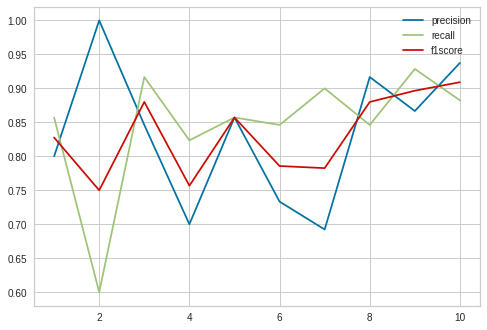

In [ ]:
#plotting the metrics at each fold
sns.lineplot(x=k,y=prec,label='precision')
sns.lineplot(x=k,y=rec,label='recall')
sns.lineplot(x=k,y=f,label='f1score')

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

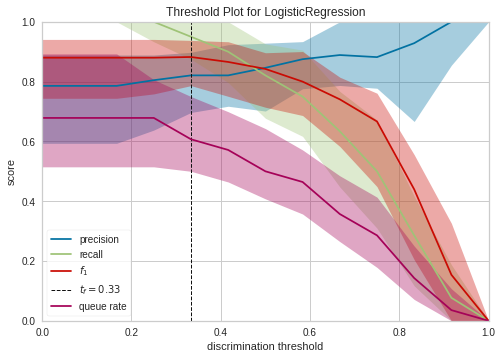

YellowbrickAttributeError: ignored

YellowbrickAttributeError: ignored

In [ ]:
##finding the optimal threshold

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier.threshold import discrimination_threshold

#visualizer = DiscriminationThreshold(rf)

discrimination_threshold(model,X_train, y_train)

# visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure

In [ ]:
X_test

NameError: ignored

In [ ]:
##generating predictions with the optimal threshold and churn risk probabilites

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_pred = model.predict_proba(X_test)
y_prediction = pd.DataFrame(y_pred,columns=['not churn','churn'])
y_prediction['prediction'] = np.where(y_prediction['churn'] > 0.33,1,0)
y_prediction

,not churn,churn,prediction
0,0.283266,0.716734,1
1,0.756355,0.243645,0
2,0.207995,0.792005,1
3,0.758693,0.241307,0
4,0.078106,0.921894,1
...,...,...,...
65,0.819166,0.180834,0
66,0.838448,0.161552,0
67,0.864250,0.135750,0
68,0.667776,0.332224,1


In [ ]:
##merging the test data with the original data

X_test['prediction'] = y_prediction['prediction'].values
X_test['churn_prob'] = y_prediction['churn'].values
orig_test = pd.merge(model_df,X_test[['prediction','churn_prob']],left_index = True, right_index = True)
orig_test

,userId,gender,churn,active_days,num_sessions,session_duration_hours,daily_avg_songs,daily_avg_friends_added,daily_avg_thumbs_up,daily_avg_thumbs_down,daily_avg_add_to_playlist,daily_avg_roll_advert,avg_songs_per_session,level,prediction,churn_prob
3,100002,F,0,55.0,4,3.353056,39.000000,0.200000,1.000000,0.000000,1.000000,0.600000,48.750000,paid,0,0.198264
5,100004,F,0,57.0,21,3.099722,48.894737,1.000000,1.842105,0.578947,1.210526,4.526316,44.857143,paid,0,0.322477
9,100008,F,0,49.0,6,8.804167,94.750000,2.125000,4.625000,0.750000,3.750000,2.500000,128.666667,free,0,0.146568
16,100015,F,1,54.0,12,4.643056,52.933333,0.933333,2.333333,0.533333,1.466667,4.600000,66.666667,paid,1,0.332224
25,100025,F,1,22.0,7,5.193056,60.000000,0.375000,2.500000,0.875000,1.125000,3.750000,70.000000,free,1,0.637572
33,108,F,0,39.0,6,7.213611,89.000000,2.142857,2.857143,0.857143,2.142857,2.714286,105.500000,paid,1,0.499309
39,113,F,0,60.0,24,4.558333,65.541667,1.333333,3.416667,0.500000,2.083333,0.041667,66.041667,paid,0,0.163911
42,116,F,0,23.0,3,2.270000,21.000000,0.666667,0.333333,0.000000,1.333333,1.000000,21.000000,free,1,0.468974
45,119,F,0,48.0,6,2.011111,24.714286,0.571429,1.000000,0.142857,0.714286,1.285714,28.833333,free,0,0.159398
46,12,F,1,19.0,9,7.625556,85.500000,1.300000,4.200000,0.900000,1.900000,2.100000,96.333333,paid,1,0.776282


In [ ]:
##calculating churn deciles based on churn risks

churn_decile_query = """select *,
                      ntile(5) over (order by churn_prob desc) as churn_deciles
                      from orig_test;
                      """
churn_decile_query_df = pysqldf(churn_decile_query)  
churn_decile_query_df      

,userId,gender,churn,active_days,num_sessions,session_duration_hours,daily_avg_songs,daily_avg_friends_added,daily_avg_thumbs_up,daily_avg_thumbs_down,daily_avg_add_to_playlist,daily_avg_roll_advert,avg_songs_per_session,level,prediction,churn_prob,churn_deciles
0,63,F,0,0.0,1,6.385556,86.000000,0.000000,6.000000,3.000000,1.000000,5.000000,87.000000,free,1,0.974307,1
1,72,F,0,0.0,1,5.571944,85.000000,3.000000,6.000000,1.000000,3.000000,10.000000,85.000000,free,1,0.912696,1
2,200024,M,1,19.0,8,3.528333,37.636364,0.818182,1.727273,1.181818,1.363636,2.454545,52.125000,paid,1,0.892573,1
3,73,F,1,22.0,6,4.318056,74.000000,2.200000,2.800000,1.400000,2.200000,0.200000,62.833333,paid,1,0.823632,1
4,87,M,1,19.0,25,2.093611,47.562500,1.687500,2.000000,0.312500,1.187500,3.125000,30.680000,paid,1,0.803377,1
5,58,M,1,21.0,12,9.696389,117.857143,1.357143,6.714286,1.428571,3.571429,0.785714,141.166667,paid,1,0.794617,1
6,139,M,0,21.0,4,6.537222,74.600000,1.200000,3.600000,1.000000,2.600000,0.200000,94.250000,paid,1,0.788967,1
7,12,F,1,19.0,9,7.625556,85.500000,1.300000,4.200000,0.900000,1.900000,2.100000,96.333333,paid,1,0.776282,1
8,200018,M,1,27.0,9,2.821667,45.500000,1.875000,1.625000,1.375000,1.375000,4.000000,40.777778,free,1,0.716734,1
9,23,F,0,22.0,4,11.375833,107.666667,2.500000,4.666667,1.000000,3.500000,3.166667,164.000000,paid,1,0.708105,1


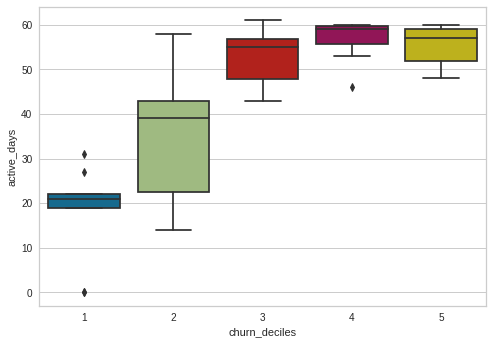

In [ ]:
##looking at active days dsitribution based on churn deciles
sns.boxplot(x='churn_deciles',y='active_days',data=churn_decile_query_df)

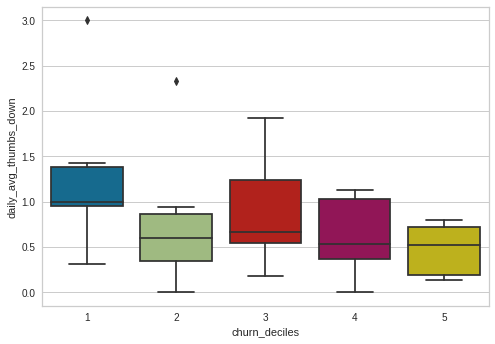

In [ ]:
##looking at thumbs down rate dsitribution based on churn deciles
sns.boxplot(x='churn_deciles',y='daily_avg_thumbs_down',data=churn_decile_query_df)

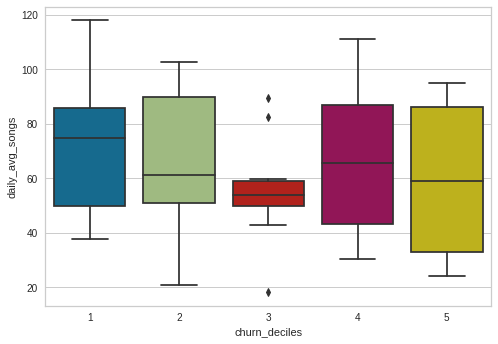

In [ ]:
##looking at songs listened rate dsitribution based on churn deciles
sns.boxplot(x='churn_deciles',y='daily_avg_songs',data=churn_decile_query_df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


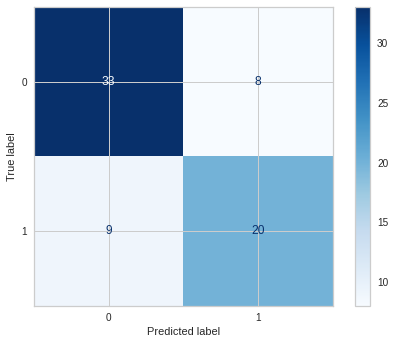

In [ ]:
##plotting the confusion matrix on test data

confusion_matrix(y_test, y_prediction['prediction'].values)
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 29.3 MB/s 


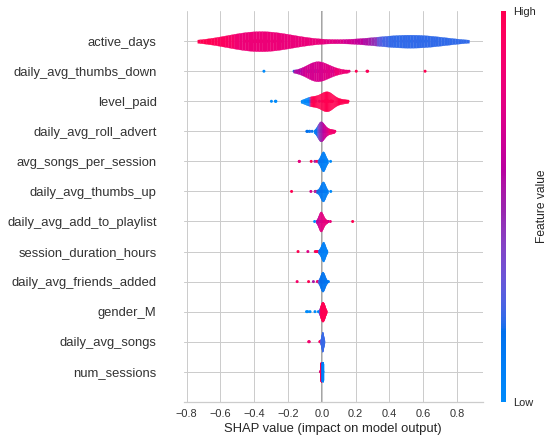

In [ ]:
##looking at global model interpretation

import shap
#X_test.drop(['prediction','churn_prob'],axis=1,inplace=True)
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

shap.summary_plot(shap_values,plot_type='violin')

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_prediction['prediction']))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73        41
           1       0.62      0.86      0.72        29

    accuracy                           0.73        70
   macro avg       0.75      0.75      0.73        70
weighted avg       0.77      0.73      0.73        70

